In [238]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lg
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq
from sklearn.decomposition import FastICA

In [257]:
len_m = 8000
x = linspace(0, len_m, len_m)  # возвращает равномерно распределённые числа в данном интервале

mu, sigma = 0, 1
a0 = 1
a1 = 0.75
a2 = 0.5
w0 = 0.18
w1 = 0.175
w2 = 0.02
k = 0.0000001

#data_1 = 0.1*(np.random.random(len_m))
#np.exp(-k*x**2)*

# T= 2*pi
f1 = np.exp(-k*x**2)*((a0 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00) + (a1 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00) + (a2 + 0.2*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.00)) + [x for x in 0.25*(np.random.normal(mu, sigma, len_m))]
f2 = np.exp(-k*x**2)*((a0 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + (a1 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + (a2 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.025)) + [x for x in 0.3*(np.random.normal(mu, sigma, len_m))]
f3 = np.exp(-k*x**2)*((a0 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + (a1 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + (a2 + 0.18*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.0085)) + [x for x in 0.2*(np.random.normal(mu, sigma, len_m))]
f4 = np.exp(-k*x**2)*((a0 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + (a1 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + (a2 + 0.22*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.01275)) + [x for x in 0.1*(np.random.normal(mu, sigma, len_m))]

Mas = np.c_[f1, f2, f3, f4]


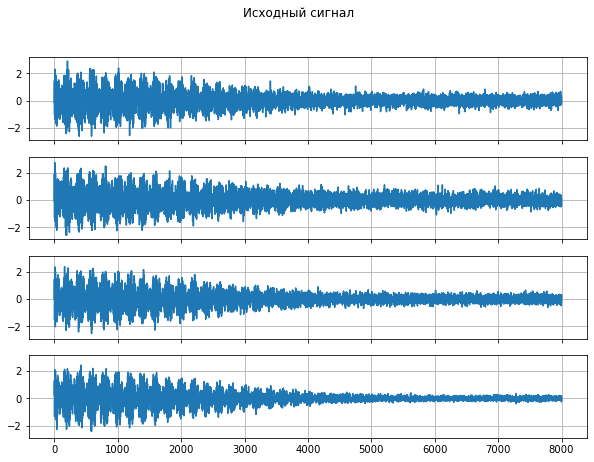

In [258]:
nrows, ncols = 4, 1
figsize = [10, 7]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Исходный сигнал')
ax[0].plot(x, f1)
ax[0].grid(True)
ax[1].plot(x, f2)
ax[1].grid(True)
ax[2].plot(x, f3)
ax[2].grid(True)
ax[3].plot(x, f4)
ax[3].grid(True)

plt.show()


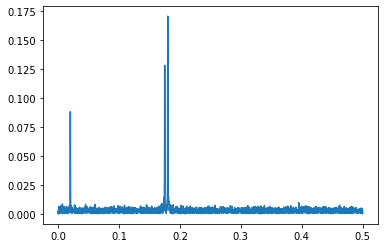

In [259]:
spectrs = rfft(f1 - np.mean(f1)) / (len(x))
nu = rfftfreq(len_m, 1.)
plt.plot(nu, np.abs(spectrs))

In [260]:
Mas2 = np.delete(Mas, (0), axis=0)
Mas2 = np.vstack([Mas2, [0, 0, 0, 0]])
print(Mas2.shape)
Mas = np.concatenate((Mas, Mas2), axis=1)
print(Mas[0])
print(Mas.shape)

(8000, 4)
[-0.13276683 -0.06741267  0.03132541  0.25910545  1.14623217  1.88418294
  1.45312026  1.28364463]
(8000, 8)


In [261]:
U, sng, Mas_SVD = lg.svd(Mas.T, full_matrices=False)
print(Mas_SVD.shape)
print(U.shape)
print(sng.shape)
#spectrf = rfft(Mas_SVD - np.mean(Mas_SVD)) / (len(x))
nu = rfftfreq(len_m, 1.)


(8, 8000)
(8, 8)
(8,)


(8000,)
0.18
0.18
0.02
0.446
0.17500000000000002
0.17500000000000002
0.18
0.18


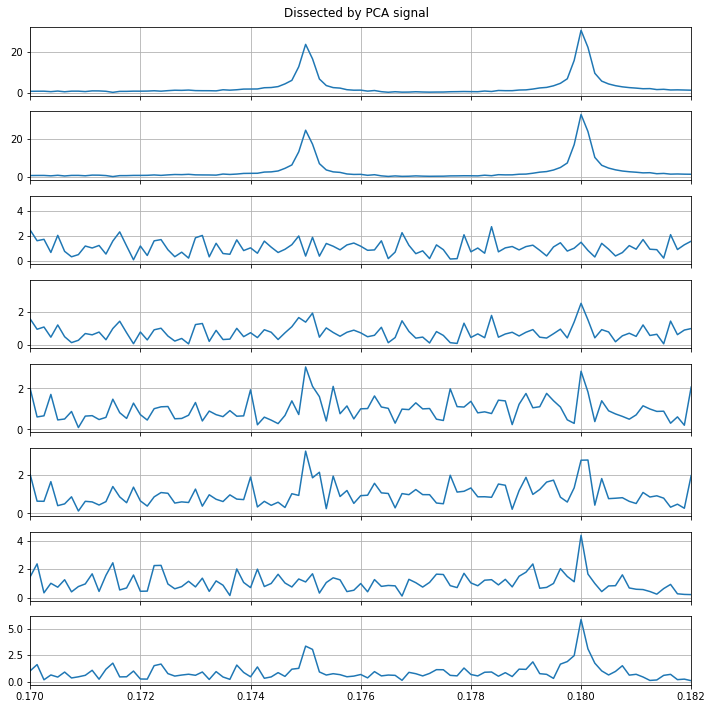

In [264]:
fig, ax = plt.subplots(nrows=8, ncols=ncols, figsize=[10, 10], sharex=True)
fig.suptitle('Dissected by PCA signal')
print(Mas_SVD[1, :].shape)
for i in range(Mas_SVD.shape[0]):
    #spectrf = rfft(Mas_SVD[i, :] - np.mean(Mas_SVD[i, :]))
    spectrf = rfft(Mas_SVD[i, :])
    ax[i].plot(nu, np.abs(spectrf))
    print(nu[np.argmax(np.abs(spectrf), axis=0)])
    
    #ax[i].plot(x,np.abs(S_[:, i]))
    ax[i].grid(True)


axes = plt.gca()
axes.set_xlim([0.17, 0.182])
plt.tight_layout()
plt.show()